In [2]:
%matplotlib inline
import glob
import h5py
import numpy as np
from brainspace.gradient import GradientMaps
from brainspace.gradient import alignment
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import helpers

HCPFilenamesList = glob.glob('../IndSubHCP/*.mat')
HCPFilenamesList.sort()
SurfaceMask=np.loadtxt('surfBilateralMask.txt')

numFiles=len(HCPFilenamesList)
numV_l=np.count_nonzero(SurfaceMask[:5000])
numV_l=np.count_nonzero(SurfaceMask[5000:])

num_bins=20
dist_mat_file = "SurfL10kConte.txt"
dist_mat_file_r = "SurfR10kConte.txt"
dist_file=np.loadtxt(dist_mat_file)
dist_file_r=np.loadtxt(dist_mat_file_r)
dist_file_masked=dist_file[np.ix_(SurfaceMask[:5000]==1,SurfaceMask[:5000]==1)]
dist_file_masked_r=dist_file_r[np.ix_(SurfaceMask[5000:]==1,SurfaceMask[5000:]==1)]


FC_l=np.zeros([dist_file_masked.shape[0],dist_file_masked.shape[0]])
FC_r=np.zeros([dist_file_masked_r.shape[0],dist_file_masked_r.shape[0]])
ind_fc_ev_l=np.zeros([numFiles,num_bins])
ind_fc_h_l=np.zeros([numFiles,num_bins])
ind_fc_ev_r=np.zeros([numFiles,num_bins])
ind_fc_h_r=np.zeros([numFiles,num_bins])
ind_fc_ev_l_2=np.zeros([numFiles,num_bins])
ind_fc_h_l_2=np.zeros([numFiles,num_bins])
ind_fc_ev_r_2=np.zeros([numFiles,num_bins])
ind_fc_h_r_2=np.zeros([numFiles,num_bins])

for i,dataName in enumerate(HCPFilenamesList):



    print(dataName)
    f = h5py.File(dataName)
    arrays = {}
    for k, v in f.items():
        arrays[k] = np.array(v)

    IndData1=arrays['rfMRI_REST1_LR']
    
    tempData=IndData1[:5000,:]
    tempDataReduced=tempData[SurfaceMask[:5000]==1,:]
    tempFC=np.corrcoef(tempDataReduced)
    ind_fc_h_l[i,:],ind_fc_ev_l[i,:]=helpers.emp_variogram_conn(tempFC,dist_file_masked,num_bins,[0,150])
    tempFC=np.arctanh(tempFC)
    np.fill_diagonal(tempFC,3)
    FC_l=FC_l+tempFC
    
    tempData=IndData1[5000:,:]
    tempDataReduced=tempData[SurfaceMask[5000:]==1,:]
    tempFC=np.corrcoef(tempDataReduced)
    ind_fc_h_r[i,:],ind_fc_ev_r[i,:]=helpers.emp_variogram_conn(tempFC,dist_file_masked_r,num_bins,[0,150])
    tempFC=np.arctanh(tempFC)
    np.fill_diagonal(tempFC,3)
    FC_r=FC_r+tempFC
    
    IndData1=arrays['rfMRI_REST1_RL']
    tempData=IndData1[:5000,:]
    tempDataReduced=tempData[SurfaceMask[:5000]==1,:]
    tempFC=np.corrcoef(tempDataReduced)
    ind_fc_h_l_2[i,:],ind_fc_ev_l_2[i,:]=helpers.emp_variogram_conn(tempFC,dist_file_masked,num_bins,[0,150])

    
    tempData=IndData1[5000:,:]
    tempDataReduced=tempData[SurfaceMask[5000:]==1,:]
    tempFC=np.corrcoef(tempDataReduced)
    ind_fc_h_r_2[i,:],ind_fc_ev_r_2[i,:]=helpers.emp_variogram_conn(tempFC,dist_file_masked_r,num_bins,[0,150])
    
    


FC_l=FC_l/(numFiles+1)
FC_l=np.tanh(FC_l)   

FC_r=FC_r/(numFiles+1)
FC_r=np.tanh(FC_r)  



../IndSubHCP/HCP_100408_downsample_hemiTimeseries.mat


/var/folders/sf/n3ybtcn11h30c98lywmccxr80000gn/T/ipykernel_9163/1999224170.py:56: RuntimeWarning: divide by zero encountered in arctanh
  tempFC=np.arctanh(tempFC)
/var/folders/sf/n3ybtcn11h30c98lywmccxr80000gn/T/ipykernel_9163/1999224170.py:64: RuntimeWarning: divide by zero encountered in arctanh
  tempFC=np.arctanh(tempFC)


../IndSubHCP/HCP_100610_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_101006_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_102513_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_102816_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_103414_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_103515_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_103818_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_104416_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_105620_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_106521_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_107018_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_108222_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_108525_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_109123_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_109830_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_110007_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_110411_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_110613_downsample_hemiTimeseries.mat
../IndSubHCP/HCP_111009_down

/var/folders/sf/n3ybtcn11h30c98lywmccxr80000gn/T/ipykernel_9163/2206294776.py:2: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


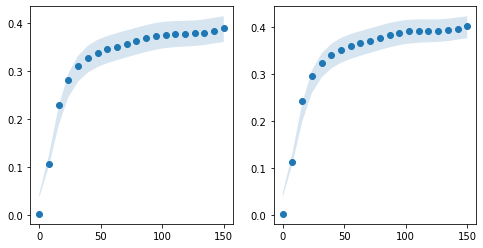

In [3]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

fig, axs = plt.subplots(1,2,figsize=(8,4))

power=2
x=ind_fc_h_l[0,:]
smoothing=0.9
mu=ind_fc_ev_l[:,:].mean(axis=0)

sigma = ind_fc_ev_l[:,:].std(axis=0)*1.96/np.power(21,0.5)

mu_s = gaussian_filter1d(mu, sigma=smoothing)
sigma_s = gaussian_filter1d(sigma, sigma=smoothing)

axs[0].fill_between(x, mu_s-sigma_s, mu_s+sigma_s, facecolor='#377eb8',
                edgecolor='none', alpha=0.2)

axs[0].plot(x, mu, 'o')



x=ind_fc_h_r[0,:]
smoothing=0.9
mu=ind_fc_ev_r[:,:].mean(axis=0)

sigma = ind_fc_ev_r[:,:].std(axis=0)*1.96/np.power(21,0.5)


mu_s = gaussian_filter1d(mu, sigma=smoothing)
sigma_s = gaussian_filter1d(sigma, sigma=smoothing)

axs[1].fill_between(x, mu_s-sigma_s, mu_s+sigma_s, facecolor='#377eb8',
                edgecolor='none', alpha=0.2)

axs[1].plot(x, mu, 'o')

plt.savefig('./imagesAvG/IndFCVG.png')


In [4]:


h_l,wb_average_ev_l=helpers.emp_variogram_conn(FC_l,dist_file_masked,num_bins,[0,150])
h_r,wb_average_ev_r=helpers.emp_variogram_conn(FC_r,dist_file_masked_r,num_bins,[0,150])



# #fit a theoretical variogram
from scipy import special
from scipy.optimize import curve_fit
import math



def hole(h, r, c0,nugget):
    a = r/3
    theoVar=nugget + c0*(1-np.sin(h/a)/(h/a))

    return theoVar
              
def gaussian(h, r, c0, nugget):
    a = r / 2
    return nugget + c0 * (1. - np.exp(- (h ** 2 / a ** 2)))

def exponential(h,r,c0,nugget):
    theoVar=nugget+c0*(1-np.exp(-h/(r/3)))
    return theoVar

models=[exponential, gaussian, hole]




clipStart=1
clipEnd=18


ModelPred_WBev_l=np.zeros([3,100])
ModelSSE_WBev_l=np.zeros([3])
ModelCof_WBev_l=np.zeros([3,3])



y=wb_average_ev_l[clipStart:clipEnd]

x=h_l[clipStart:clipEnd]
x_long=np.linspace(0, 150, num=100)

bounds = (0.00001, [np.nanmax(x),np.nanmax(y),np.nanmax(y)/10])
cof = None
cov = None

for ind,model in enumerate(models):
    cof, cov = curve_fit(model,x, y, method='trf',p0=bounds[1],bounds=bounds,maxfev=5000)
    v_pred=model(x_long,*cof)
    v_pred2=model(x,*cof)
    ModelPred_WBev_l[ind,:]=v_pred
    ModelSSE_WBev_l[ind]=np.sum((v_pred2-y)**2)
    ModelCof_WBev_l[ind,:]=cof

ModelPred_WBev_r=np.zeros([3,100])
ModelSSE_WBev_r=np.zeros([3])
ModelCof_WBev_r=np.zeros([3,3])



y=wb_average_ev_r[clipStart:clipEnd]

x=h_r[clipStart:clipEnd]
y_long=wb_average_ev_r
bounds = (0.00001, [np.nanmax(x),np.nanmax(y),np.nanmax(y)/10])
cof = None
cov = None

for ind,model in enumerate(models):
    cof, cov = curve_fit(model,x, y, method='trf',p0=bounds[1],bounds=bounds,maxfev=5000)
    v_pred=model(x_long,*cof)
    v_pred2=model(x,*cof)
    ModelPred_WBev_r[ind,:]=v_pred
    ModelSSE_WBev_r[ind]=np.sum((v_pred2-y)**2)
    ModelCof_WBev_r[ind,:]=cof

/var/folders/sf/n3ybtcn11h30c98lywmccxr80000gn/T/ipykernel_9163/109158386.py:15: RuntimeWarning: invalid value encountered in true_divide
  theoVar=nugget + c0*(1-np.sin(h/a)/(h/a))


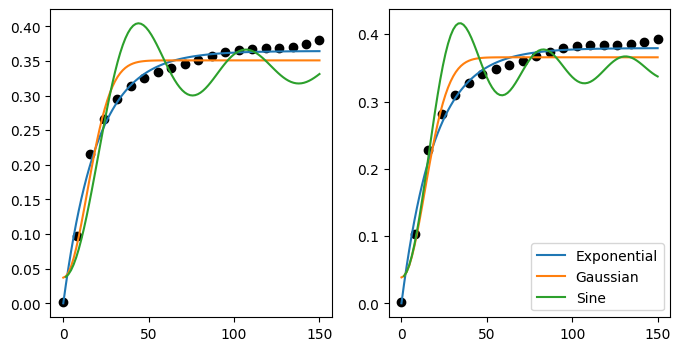

In [14]:


fig, axs = plt.subplots(1,2,figsize=(8,4))


axs[0].plot(h_l, wb_average_ev_l, 'o',c='black')
axs[0].plot(x_long,ModelPred_WBev_l.T,label=['Exponential','Gaussian','Sine'])


axs[1].plot(h_r, wb_average_ev_r, 'o',c='black')
axs[1].plot(x_long,ModelPred_WBev_r.T,label=['Exponential','Gaussian','Sine'])
axs[1].legend()

plt.savefig('./imagesAvG/WBVariogramWithTheo.png')

In [8]:

ModelCof_IndWBev_l=np.zeros([51,3,3])
ModelCof_IndWBev_l_2=np.zeros([51,3,3])
ModelCof_IndWBev_r=np.zeros([51,3,3])
ModelCof_IndWBev_r_2=np.zeros([51,3,3])


clipStart=1
clipEnd=18
for i in range(51):
    y=ind_fc_ev_l[i,clipStart:clipEnd]

    x=h_l[clipStart:clipEnd]
    x_long=np.linspace(0, 150, num=100)

    bounds = (0.00001, [np.nanmax(x),np.nanmax(y),np.nanmax(y)/10])
    cof = None
    cov = None

    for ind,model in enumerate(models):
        cof, cov = curve_fit(model,x, y, method='trf',p0=bounds[1],bounds=bounds,maxfev=5000)

        ModelCof_IndWBev_l[i,ind,:]=cof
    
    y=ind_fc_ev_l_2[i,clipStart:clipEnd]

    x=h_l[clipStart:clipEnd]
    x_long=np.linspace(0, 150, num=100)

    bounds = (0.00001, [np.nanmax(x),np.nanmax(y),np.nanmax(y)/10])
    cof = None
    cov = None

    for ind,model in enumerate(models):
        cof, cov = curve_fit(model,x, y, method='trf',p0=bounds[1],bounds=bounds,maxfev=5000)  
        ModelCof_IndWBev_l_2[i,ind,:]=cof

        
for i in range(51):
    y=ind_fc_ev_r[i,clipStart:clipEnd]

    x=h_l[clipStart:clipEnd]
    x_long=np.linspace(0, 150, num=100)

    bounds = (0.00001, [np.nanmax(x),np.nanmax(y),np.nanmax(y)/10])
    cof = None
    cov = None

    for ind,model in enumerate(models):
        cof, cov = curve_fit(model,x, y, method='trf',p0=bounds[1],bounds=bounds,maxfev=5000)

        ModelCof_IndWBev_r[i,ind,:]=cof
    
    y=ind_fc_ev_r_2[i,clipStart:clipEnd]

    x=h_l[clipStart:clipEnd]
    x_long=np.linspace(0, 150, num=100)

    bounds = (0.00001, [np.nanmax(x),np.nanmax(y),np.nanmax(y)/10])
    cof = None
    cov = None

    for ind,model in enumerate(models):
        cof, cov = curve_fit(model,x, y, method='trf',p0=bounds[1],bounds=bounds,maxfev=5000)
        ModelCof_IndWBev_r_2[i,ind,:]=cof




SpearmanrResult(correlation=0.7403619909502261, pvalue=5.322402054141265e-10)
SpearmanrResult(correlation=0.647420814479638, pvalue=2.830241403966263e-07)
SpearmanrResult(correlation=0.7295022624434389, pvalue=1.2632140191957486e-09)
SpearmanrResult(correlation=0.6836199095022625, pvalue=3.226121345509202e-08)


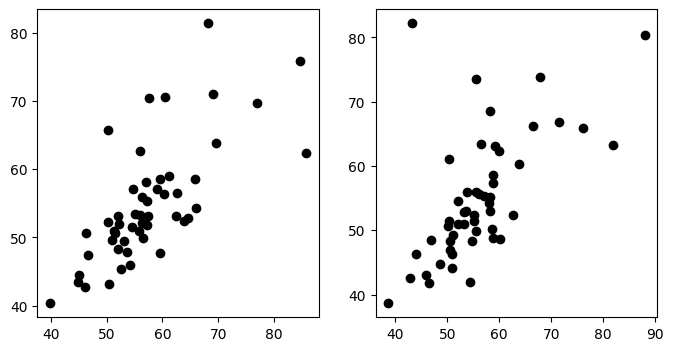

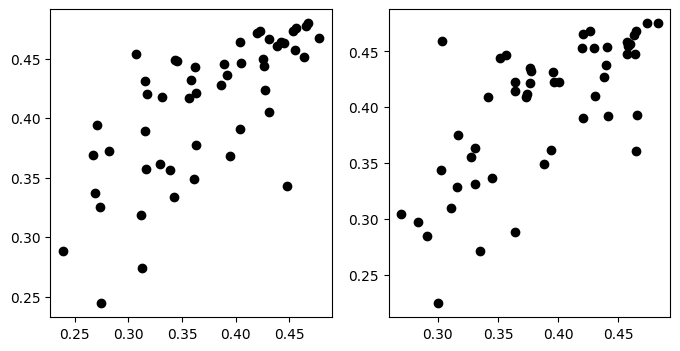

In [15]:
import matplotlib
from scipy import stats
matplotlib.rc_file_defaults()


fig, axs = plt.subplots(1,2,figsize=(8,4))
fig.patch.set_alpha(0)
print(stats.spearmanr(ModelCof_IndWBev_l[:,0,0],ModelCof_IndWBev_l_2[:,0,0]))

axs[0].plot(ModelCof_IndWBev_l[:,0,0],ModelCof_IndWBev_l_2[:,0,0], 'o',c='black')
axs[0].grid(False)


print(stats.spearmanr(ModelCof_IndWBev_r[:,0,0],ModelCof_IndWBev_r_2[:,0,0]))

axs[1].plot(ModelCof_IndWBev_r[:,0,0],ModelCof_IndWBev_r_2[:,0,0], 'o',c='black')
axs[1].grid(False)
plt.savefig('./imagesAvG/TestRetestRange_Both.png')


import matplotlib
from scipy import stats
matplotlib.rc_file_defaults()
#print(np.corrcoef(ModelCof_IndWBev_l[:,1,0],ModelCof_IndWBev_l_2[:,1,0]))

fig, axs = plt.subplots(1,2,figsize=(8,4))
fig.patch.set_alpha(0)
print(stats.spearmanr(ModelCof_IndWBev_l[:,0,1],ModelCof_IndWBev_l_2[:,0,1]))

axs[0].plot(ModelCof_IndWBev_l[:,0,1],ModelCof_IndWBev_l_2[:,0,1], 'o',c='black')
axs[0].grid(False)
#plt.savefig('/Users/robleech/Dropbox/BrainSmash/imagesAvG/TestRetestRange.png')

print(stats.spearmanr(ModelCof_IndWBev_r[:,0,1],ModelCof_IndWBev_r_2[:,0,1]))
#fig, axs = plt.subplots(1,1,figsize=(4,4))
axs[1].plot(ModelCof_IndWBev_r[:,0,1],ModelCof_IndWBev_r_2[:,0,1], 'o',c='black')

axs[1].grid(False)
plt.savefig('./imagesAvG/TestRetestSill_Both.png')


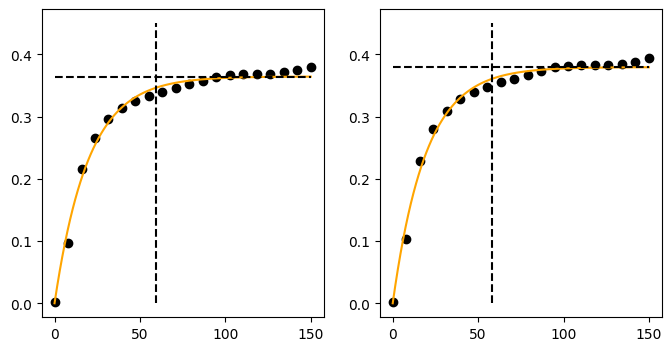

In [20]:


fig, axs = plt.subplots(1,2,figsize=(8,4))

est_range=ModelCof_WBev_l[0,0]
est_sill=ModelCof_WBev_l[0,1]
sill_line_x=np.linspace(0, 150, num=10)
sill_line_y=np.ones([10])*est_sill

range_line_y=np.linspace(0, 0.45, num=10)
range_line_x=np.ones([10])*est_range

axs[0].plot(h_l, wb_average_ev_l, 'o',c='black')
axs[0].plot(x_long,ModelPred_WBev_l[0,:],c='orange')
axs[0].plot(range_line_x,range_line_y,'--',c='black')
axs[0].plot(sill_line_x,sill_line_y,'--',c='black')

est_range=ModelCof_WBev_r[0,0]
est_sill=ModelCof_WBev_r[0,1]
sill_line_x=np.linspace(0, 150, num=10)
sill_line_y=np.ones([10])*est_sill

range_line_y=np.linspace(0, 0.45, num=10)
range_line_x=np.ones([10])*est_range



axs[1].plot(h_r, wb_average_ev_r, 'o',c='black')
axs[1].plot(x_long,ModelPred_WBev_r[0,:],c='orange')
axs[1].plot(range_line_x,range_line_y,'--',c='black')
axs[1].plot(sill_line_x,sill_line_y,'--',c='black')
plt.savefig('./imagesAvG/WBVariogramExponentialRange.png')